# Packages

Below we have cells dedicated to installing some of the necessary packages if you do not already have them. You only need to uncomment and run these cells once. You may need to restart your kernel, but once done you can recomment or delete the cells entirely. PRO TIP: You can comment/uncomment a cell easily in jupyter notebook via CTRL+'/' or CMD+'/'. 

In [1]:
# pip install gensim

In [2]:
# pip install numpy

In [3]:
# pip install matplotlib

# Setup
First we import our necessary packages. 

The cell after will load in a model - for now don't worry too much about this model but the cell will probably take a while to run, it is loading in a model that is quite large! 

In [4]:
import gensim
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api
import numpy as np

In [23]:
model = gensim.downloader.load('word2vec-google-news-300')

# Section 1 - Introduction to NLP and Word2Vec
Natural Language Processing is a branch of AI that focuses on getting machines to understand language as spoken by humans. The image below shows an example of a simple way to process language called document summarization. It takes a corpus of documents and calculates the frequency of different topics, based on the words that appear in the corpus. This is an easy way to determine general ideas presented in a corpus. But how do we get a machine to learn from what they read?
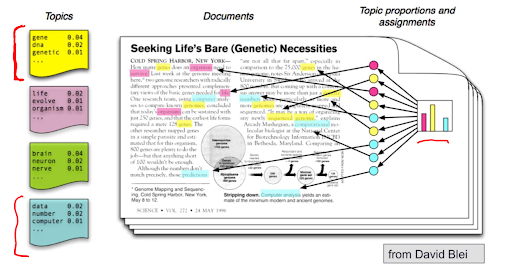

Word2Vec is an algorithm for natural language processing that is able to learn from a corpus and associate words with other words. It does this using a neural network to create word embeddings. Word embeddings are a numerical representation of a word, typically a vector of real numbers. If you’re interested in learning more about how Word2Vec works, visit the following links: https://jalammar.github.io/illustrated-word2vec/ https://www.tensorflow.org/tutorials/text/word2vec


# Section 2 - Using Word2Vec
Let's start off simple. Below we use the model to get the word embedding of the word "car" and print out the vector representation. Woah, that's a lot! We can already start to see the mysterious black box that comes with a lot of machine learning tools that rely on neural networks. A whole lot of numbers - but but do we really know what they mean?

**2.1 Code this:** Get the shape of the embedding and print it out. Also try a second word embedding on whatever word you would like and do the same.

In [6]:
# Get the embedding for the word "car"
word = "car"
word_embedding = model[word]
print(word_embedding)

# CODE THIS:
embedding_shape = ...

[ 0.13085938  0.00842285  0.03344727 -0.05883789  0.04003906 -0.14257812
  0.04931641 -0.16894531  0.20898438  0.11962891  0.18066406 -0.25
 -0.10400391 -0.10742188 -0.01879883  0.05200195 -0.00216675  0.06445312
  0.14453125 -0.04541016  0.16113281 -0.01611328 -0.03088379  0.08447266
  0.16210938  0.04467773 -0.15527344  0.25390625  0.33984375  0.00756836
 -0.25585938 -0.01733398 -0.03295898  0.16308594 -0.12597656 -0.09912109
  0.16503906  0.06884766 -0.18945312  0.02832031 -0.0534668  -0.03063965
  0.11083984  0.24121094 -0.234375    0.12353516 -0.00294495  0.1484375
  0.33203125  0.05249023 -0.20019531  0.37695312  0.12255859  0.11425781
 -0.17675781  0.10009766  0.0030365   0.26757812  0.20117188  0.03710938
  0.11083984 -0.09814453 -0.3125      0.03515625  0.02832031  0.26171875
 -0.08642578 -0.02258301 -0.05834961 -0.00787354  0.11767578 -0.04296875
 -0.17285156  0.04394531 -0.23046875  0.1640625  -0.11474609 -0.06030273
  0.01196289 -0.24707031  0.32617188 -0.04492188 -0.114257

(300,)


**2.2 Answer this:** Are the shapes of the two embeddings the same? 

*Your answer:* ...

Now, we explore the "power" of Word2Vec. The way gensim implements Word2Vec gives us a couple of very useful functions. We explore *most_similar* and *similarity* below. Also note: these functions can take some time, especially since the model we are using is huge. For example, *most_similar* needs to find the word embedding for the word we choose and compare it to all others to find the most similar ones. Similarity takes values between (0,1].

In [7]:
model.most_similar(word)

[('vehicle', 0.7821096181869507),
 ('cars', 0.7423831224441528),
 ('SUV', 0.7160962820053101),
 ('minivan', 0.6907036304473877),
 ('truck', 0.6735789775848389),
 ('Car', 0.667760968208313),
 ('Ford_Focus', 0.6673202514648438),
 ('Honda_Civic', 0.662684977054596),
 ('Jeep', 0.6511331796646118),
 ('pickup_truck', 0.64414381980896)]

In [8]:
model.similarity(word,"van")

0.6115673

Similarity between word embeddings simply means some sort of mathematical metric (usually cosine similarity) of similarity between the vectors themselves. So while we are attempting to capture some sense of "similarity" between two words, this measure does not always transfer over to our ideas of what words are similar. 

In [9]:
model.similarity(word,"electric")

0.24105665

In [10]:
model.similarity(word,"plane")

0.3779698

**2.3 Answer this:** What do you personally think is the similarity between "car" and "electric" as well as "car" and "plane" and which which you consider "more similar"? How do you think Word2Vec is doing in capturing these similarities in this case, and what worries or excites you about this?

*Your answer:* ...

What excited so many computer scientists when Word2Vec was first created was not only the ability to capture similarity between words, but actually use those similarities to encompass some critical ideas. As a human, you can probably finish this sentence for me: "Berlin is to Germany, as ___ is to France". What's actually quite cool, is that Word2Vec can take advantage of this, and this is one of the more famous examples in the a lot of literature (you will see this example referenced a lot if you've done any work with Word2Vec): Berlin - Germany + France. 

In [11]:
model.most_similar(positive=["France","Berlin"],negative=["Germany"])

[('Paris', 0.7672388553619385),
 ('French', 0.6049168109893799),
 ('Parisian', 0.5810437202453613),
 ('Colombes', 0.5599985122680664),
 ('Hopital_Europeen_Georges_Pompidou', 0.555890679359436),
 ('Melun', 0.5512701272964478),
 ('Dinard', 0.5451847910881042),
 ('Brussels', 0.5420990586280823),
 ('Mairie_de', 0.5337448120117188),
 ('Cagnes_sur_Mer', 0.531246542930603)]

**2.4 Code this:** Try this out for another pairing of capital-countries. Or maybe think of another application entirely.

In [12]:
# CODE THIS


Word2Vec can pretty accurately encompass the idea of a capital. Though we do not have it coded, the same can be said about verb tense (see the figure in the next section for an example) and other ideas. Additionally, the idea of using NLP for predictions is everywhere. You use it almost everyday when you search and you have a bunch of suggestions of how to finish your search query. In fact, this one of the major reasons NLP was researched in the first place. 

**2.5 Answer this:** Where else have you seen NLP used? What worries or excites you about prediction or other applications you've seen?

*Your answer:* ...

# Section 3 - Starting to investigate bias in Word2Vec
As we’ve discussed a lot in this course, AI and machine learning models are not perfect. And with imperfection comes bias. In this section, we’ll explore different word embeddings that imply bias. 

As we explored briefly in the previous section, similarity is an abstract concept. What we think of when we say similarity does not entirely match the underlying mathematical similarity we compute. Word2Vec does not look at the context of the words on which it was trained on. Instead, it simply looks at associations between how often other words show up near the word we care about. For a more in depth look into how Word2Vec operates see this link about continuous bag of words (CBOW) and skip-gram: https://towardsdatascience.com/nlp-101-word2vec-skip-gram-and-cbow-93512ee24314

<!-- <table><tr>
<td> 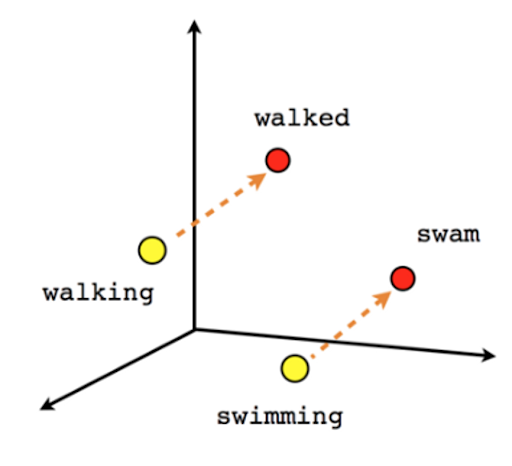 </td>
<td> <img src="attachment:king%20queen.png" alt="King Queen" style="width: 250px;"/> </td>
</tr></table> -->
<div>
    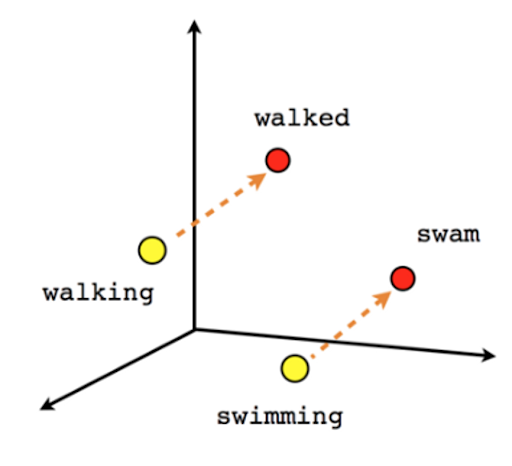   
</div>


<div>
    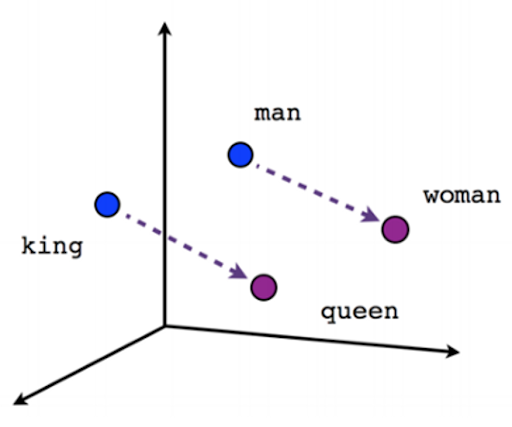 
</div>

## Be careful! 
It's easy to assume bias and falsely attribute some causal relationship to the data. Like the saying goes, "if you go looking for something, you'll find it". As with this entire assignment, we don't actually know why we are seeing the number we are seeing - we have might have an idea or some worries, but we do not ultimately know. Is there a racial bias present amongst articles which discuss painters? Well, maybe, but we should not assume so based solely off what we present in this assignment. Word2Vec ignores context, so although black and white might be loosely associated with painter it is hard to tell if its because of race or simply the colors black and white with which painters work with all the time.

In [13]:
print(model.similarity("painter","black"))
print(model.similarity("painter","white"))

0.10742523
0.14594205


As promised, Word2Vec also can be used to relate verb tenses. 

**3.1 Code This:** Use the figure above and some of your code from 2.4 to use walking, walked, and one tense of swim to get the other tense of swim.

In [14]:
# CODE THIS
# model.most_similar(...)

We have also finally arrived at probably the most famous result from Word2Vec, the King Queen example.

In [15]:
model.most_similar(positive=["king","woman"],negative=["man"])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431607246399),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

**3.2 Answer this:** What human concept are we trying to exploit using Word2Vec? Why might this be a useful result? What are the dangers of entrusting a machine to interpret a human concept?

*Your answer:* ...

Delving deeper into areas of bias...
<div>
    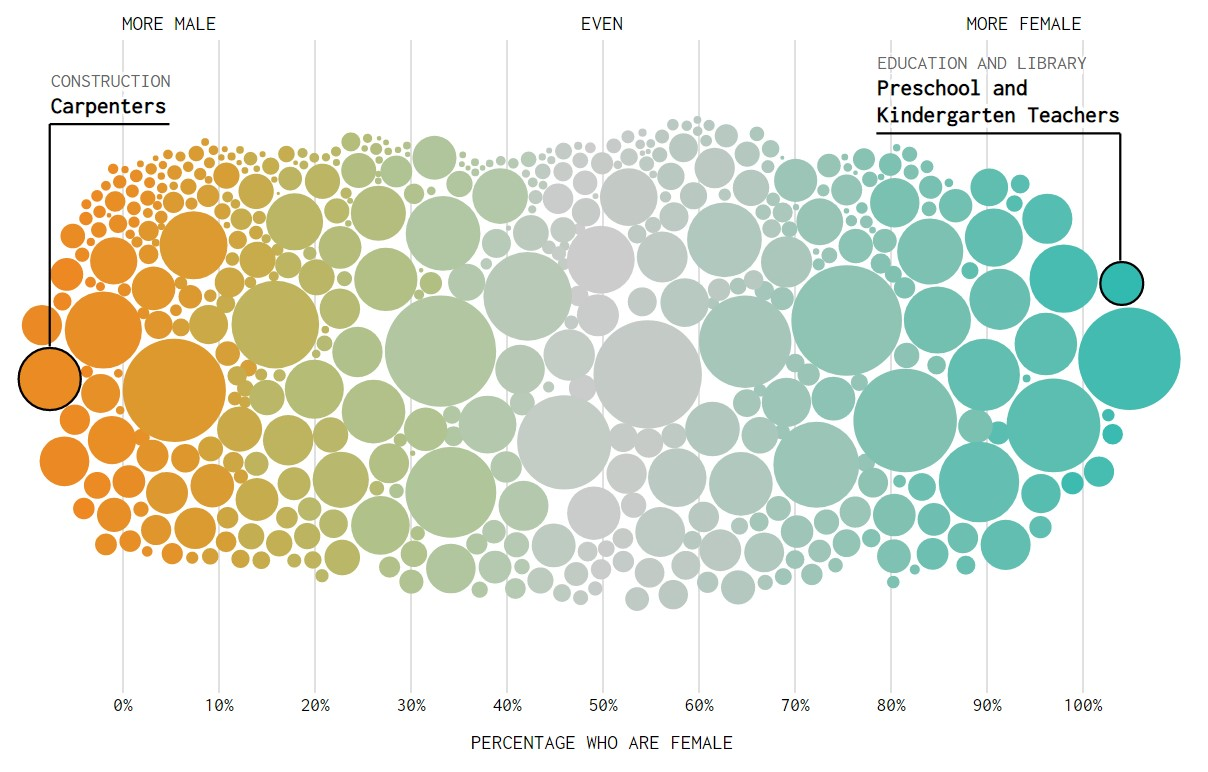 
</div>

**3.3 Code this:** Visit this great visualization by Nathan Yau of the percentage of male/female workers in certain occupations plotted on a spectrum. Instead of king-queen, try out some male or female dominated occupations. We've done one of the most studied cases for you. NOTE: Be careful of the difference between male or female dominated fields. Would you try to do 

https://flowingdata.com/2017/09/11/most-female-and-male-occupations-since-1950/

In [16]:
model.most_similar(positive=["woman","computer_programmer"],negative=["man"])

[('homemaker', 0.5627118945121765),
 ('housewife', 0.5105046033859253),
 ('graphic_designer', 0.5051802396774292),
 ('schoolteacher', 0.497949481010437),
 ('businesswoman', 0.49348917603492737),
 ('paralegal', 0.49255111813545227),
 ('registered_nurse', 0.4907974600791931),
 ('saleswoman', 0.4881627559661865),
 ('electrical_engineer', 0.4797726571559906),
 ('mechanical_engineer', 0.4755399525165558)]

In [17]:
# CODE THIS

**3.4 Answer this:** What did you find? Were you surprised by any results in particular? Where do you think the potential problems lie?

*Your answer:* ...

# Section 4 - A different training corpus

Up until now, we've been using one of the premier, gigantic corpuses made from Google News. A corpus is just a fancy way of saying a training set of sentences for Word2Vec to be trained on. As the name implies, the corpus is made from millions of articles available at the time of creation. 

A full list of models supported by gensim by default can be found here: https://github.com/RaRe-Technologies/gensim/blob/develop/gensim/models/word2vec.py, but keep in mind you can also train Word2Vec on your own corpus! And many people have done so and published there models elsewhere.

In this section we will explore the potential differences (and dangers) of using different corpuses of text

**4.1 Answer this:** Off the top of your head, what differences do you anticipate between using different corpuses? Do you suspect any overaching themes between using Google News versus Wikipedia or Twitter as our training grounds?

*Your answer:* ...

In [33]:
# NOTE: This will take a long time, but I promise it's cool! 
wiki_model = gensim.downloader.load('glove-wiki-gigaword-300')
twitter_model = gensim.downloader.load('glove-twitter-200')

[=================================================-] 99.8% 756.7/758.5MB downloaded


We're ESE/CSE's after all, so we deal with circuits a lot. Let's see what each model thinks is most similar to a circuit.

In [48]:
model.most_similar("circuit")

[('circuits', 0.7530251741409302),
 ('circut', 0.6202580332756042),
 ('Pudenz_®_brand', 0.5677723288536072),
 ('Brands_Hatch_Grand_Prix', 0.5560801029205322),
 ('Brands_Hatch_GP', 0.5559306144714355),
 ('packet_narrowband', 0.5514232516288757),
 ('director_Ramon_Pradera', 0.5479720234870911),
 ('Valencia_Ricardo_Tormo', 0.5345189571380615),
 ('laps_###.###km', 0.5329551100730896),
 ('twisty_Ricardo_Tormo', 0.5329512357711792)]

In [49]:
wiki_model.most_similar("circuit")

[('circuits', 0.5813344120979309),
 ('appeals', 0.5144815444946289),
 ('court', 0.46676933765411377),
 ('judge', 0.45699357986450195),
 ('appellate', 0.43504196405410767),
 ('courts', 0.42194798588752747),
 ('prix', 0.40702903270721436),
 ('suzuka', 0.39734673500061035),
 ('judges', 0.3888646960258484),
 ('9th', 0.38861793279647827)]

In [50]:
twitter_model.most_similar("circuit")

[('race', 0.5097535252571106),
 ('interval', 0.5071332454681396),
 ('grid', 0.495891809463501),
 ('cycle', 0.4931078851222992),
 ('motion', 0.4904831647872925),
 ('circuits', 0.4886697232723236),
 ('board', 0.47897377610206604),
 ('training', 0.47691550850868225),
 ('session', 0.4747787415981293),
 ('cardio', 0.4686027467250824)]

You might see some very interesting results, take some time and answer the following.

**4.2 Answer this:** What are the major themes across each model? Is this a useful thing? 

*Your answer:* ...

TRIGGER WARNING: Use of terror/terrorism and potential associations. We are trying to investigate potential bias, but we realize this can be harmful to some people. Skip this part if necessary.

Next, we see what the different corpuses think of "terrorist".

In [52]:
model.most_similar("terrorist")

[('terror', 0.8476202487945557),
 ('terrorists', 0.80003821849823),
 ('terrorism', 0.7522496581077576),
 ('al_Qaeda', 0.7314331531524658),
 ('Terrorist', 0.7178781032562256),
 ('Al_Qaeda', 0.7080404162406921),
 ('extremist', 0.681232750415802),
 ("al_Qa'ida", 0.6795461177825928),
 ('jihadist', 0.6788939237594604),
 ('al_Qaida', 0.6745679378509521)]

In [53]:
twitter_model.most_similar("terrorist")

[('terrorists', 0.7696176767349243),
 ('terrorism', 0.7433343529701233),
 ('attacks', 0.6373909711837769),
 ('bombing', 0.6256234645843506),
 ('extremist', 0.6239424347877502),
 ('taliban', 0.6112457513809204),
 ('muslim', 0.5831813812255859),
 ('jihadist', 0.5722413659095764),
 ('communist', 0.5699522495269775),
 ('qaeda', 0.5643658638000488)]

In [54]:
wiki_model.most_similar("terrorist")

[('terror', 0.8342181444168091),
 ('terrorists', 0.7970923781394958),
 ('terrorism', 0.781484842300415),
 ('attacks', 0.7183513641357422),
 ('qaida', 0.7041255235671997),
 ('qaeda', 0.6885311007499695),
 ('extremist', 0.6289576888084412),
 ('extremists', 0.6135696172714233),
 ('bombings', 0.6122392416000366),
 ('militant', 0.5995929837226868)]

**4.3 Answer this:** Again, do you observe any themes across the different models? Is this a fair expectation, or is this a worrisome outcome?

*Your answer:* ...

Feel free to try other words or corpuses. You may find surprising thigns (or the lack thereof)! We just scratched the surface.